# EWMPCA

In [1]:
if (!require("arrow")) {
    install.packages("arrow");
    library(arrow);
}


Loading required package: arrow


Attaching package: ‘arrow’


The following object is masked from ‘package:utils’:

    timestamp




In [2]:
first_year = 2008; last_year = 2020;

# read the equity_indices
df = read_parquet('./data/equity_indices.parquet')

In [3]:
df = df[df$Datetime >= "2008-01-01" & df$Datetime <= "2020-12-31 23:59:59",];

In [4]:
head(df)

,DY,ES,EW,FX,MX,NQ,RTY,X,YM,Datetime
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2231,0,0,0,0,0,0,0,0,0.0018232415,2008-01-01 14:00:00
2232,0,0,0,0,0,0,0,0,-0.0003831418,2008-01-01 15:00:00
2233,0,0,0,0,0,0,0,0,0.0006707551,2008-01-01 16:00:00
2234,0,0,0,0,0,0,0,0,-0.0008618213,2008-01-01 17:00:00
2235,0,0,0,0,0,0,0,0,-0.0018209699,2008-01-01 18:00:00
2236,0,0,0,0,0,0,0,0,-0.0012481997,2008-01-01 19:00:00


In [5]:
tail(df)

,DY,ES,EW,FX,MX,NQ,RTY,X,YM,Datetime
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
81766,0,-0.0010771509,0.0002614949,0,0,-0.0035443728,-0.0003043677,0,0.0000331686,2020-12-31 06:00:00
81767,0,0.0014152851,0.0018299856,0,0,0.0017784900,0.0003044603,0,0.0011276949,2020-12-31 07:00:00
81768,0,-0.0003364964,-0.0006523725,0,0,-0.0007023294,-0.0006087354,0,-0.0003975616,2020-12-31 08:00:00
81769,0,0.0028948431,0.0021324745,0,0,0.0020303776,0.0018273184,0,0.0031154713,2020-12-31 09:00:00
81770,0,0.0028193596,-0.0021713641,0,0,0.0021821299,-0.0012159903,0,0.0029405934,2020-12-31 10:00:00
81771,0,0.0011379610,0.0027853941,0,0,0.0010303667,0.0020798458,0,0.0004612090,2020-12-31 11:00:00


In [6]:
Z = prcomp(df[,1:9], retx = TRUE)

In [7]:
classical_pca = Z$x;

In [8]:
head(classical_pca)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
2231,0.0004218708,0.0005528499,9.158623e-05,-1.294391e-04,0.0007411066,-2.010741e-04,0.0008864193,0.0005319342,-0.0010451609
2232,-0.0001537578,-0.0001379960,-2.403844e-05,2.731519e-05,-0.0001632364,4.058322e-05,-0.0001762440,-0.0001094920,0.0002215886
2233,0.0001211958,0.0001919921,3.119062e-05,-4.755978e-05,0.0002687304,-7.484637e-05,0.0003313457,0.0001968904,-0.0003834845
2234,-0.0002786417,-0.0002878765,-4.912345e-05,6.132338e-05,-0.0003594355,9.301129e-05,-0.0004067911,-0.0002486508,0.0004964126
2235,-0.0005288763,-0.0005881978,-9.938727e-05,1.294669e-04,-0.0007525673,1.980634e-04,-0.0008687472,-0.0005274886,0.0010470879
2236,-0.0003794449,-0.0004088564,-6.937146e-05,8.877395e-05,-0.0005178027,1.353299e-04,-0.0005928831,-0.0003609764,0.0007182438


In [9]:
source("xpca.R")

In [10]:
minLimit = min(dim(df)[1], 100);
cov_init = cov(df[1:minLimit,1:9]);
W_init = sorted_eig(cov_init);

[1] "eigen values:"
[1] -4.235165e-22  2.354068e-07  4.914251e-07  1.022780e-06  1.291535e-06
[6]  3.404366e-06  5.071879e-06  1.660871e-05  7.202036e-05
[1] "eigen vectors:"
            [,1]        [,2]          [,3]          [,4]          [,5]
 [1,] -0.1996741  0.07645926  1.983089e-01  4.841814e-01 -8.637406e-02
 [2,] -0.3372554  0.09022704 -3.775480e-01 -3.033985e-04 -2.638490e-01
 [3,] -0.3914986  0.03247891 -2.835584e-01 -3.244092e-01 -5.313739e-02
 [4,] -0.3387562  0.13546927  1.213399e-01  6.766690e-01  2.715568e-01
 [5,]  0.0000000  0.00000000 -1.110223e-16  5.551115e-17 -7.216450e-16
 [6,] -0.3999386  0.10536006 -3.932606e-01 -1.255838e-01  6.302252e-01
 [7,] -0.3330048 -0.92770945  1.511169e-01 -5.444671e-03  6.989420e-03
 [8,] -0.4449276  0.29172639  7.193356e-01 -4.161549e-01  5.571709e-03
 [9,] -0.3309962  0.09877456 -1.675363e-01  1.160182e-01 -6.701439e-01
               [,6]          [,7]          [,8]          [,9]
 [1,]  1.639014e-01  7.857331e-01 -1.697808e-01  0.00

In [11]:
W_init

-0.1996741,0.07645926,1.983089e-01,4.841814e-01,-8.637406e-02,1.639014e-01,7.857331e-01,-1.697808e-01,0.000000e+00
-0.3372554,0.09022704,-3.775480e-01,-3.033985e-04,-2.638490e-01,-5.766015e-02,-1.871674e-01,-7.922138e-01,1.177048e-16
-0.3914986,0.03247891,-2.835584e-01,-3.244092e-01,-5.313739e-02,7.677593e-01,5.767403e-02,2.538169e-01,-8.991416e-16
-0.3387562,0.13546927,1.213399e-01,6.766690e-01,2.715568e-01,1.699031e-01,-5.258815e-01,1.229903e-01,-5.227561e-16
0.0000000,0.00000000,-1.110223e-16,5.551115e-17,-7.216450e-16,-8.881784e-16,1.526557e-16,5.551115e-17,-1.000000e+00
-0.3999386,0.10536006,-3.932606e-01,-1.255838e-01,6.302252e-01,-4.254085e-01,2.511750e-01,1.314464e-01,4.407229e-17
-0.3330048,-0.92770945,1.511169e-01,-5.444671e-03,6.989420e-03,-6.556450e-02,-2.085652e-02,-2.853914e-02,7.987552e-17
-0.4449276,0.29172639,7.193356e-01,-4.161549e-01,5.571709e-03,-1.115874e-01,-6.398850e-02,-9.863625e-02,1.009390e-16
-0.3309962,0.09877456,-1.675363e-01,1.160182e-01,-6.701439e-01,-3.921319e-01,-9.788791e-03,4.860045e-01,1.209388e-15


In [12]:
ewm_pca = ewmpca3(df[,1:9], 0.9305, W_init);

In [13]:
dim(ewm_pca);

[1] 79541     9

In [14]:
head(ewm_pca, 100);

0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
-1.518476e-04,1.101235e-04,-8.885295e-05,-7.500025e-05,-3.796195e-05,2.628850e-05,2.238128e-05,-2.218037e-06,2.369901e-19
8.522877e-05,-6.180996e-05,4.987125e-05,4.209603e-05,2.130723e-05,-1.475517e-05,-1.256213e-05,1.244936e-06,-1.330175e-19
3.623340e-06,-2.627734e-06,2.120182e-06,1.789633e-06,9.058365e-07,-6.272882e-07,-5.340552e-07,5.292612e-08,-5.654986e-21
-7.643172e-05,5.543013e-05,-4.472370e-05,-3.775101e-05,-1.910796e-05,1.323219e-05,1.126551e-05,-1.116438e-06,1.192878e-19
7.592419e-05,-5.506206e-05,4.442672e-05,3.750033e-05,1.898108e-05,-1.314432e-05,-1.119070e-05,1.109025e-06,-1.184957e-19
-1.951993e-04,-1.877706e-04,-1.629888e-04,1.408629e-04,-1.081301e-04,-1.068079e-04,2.021813e-05,-1.555318e-05,3.271789e-19
-8.549743e-04,7.864808e-04,5.363875e-04,4.225721e-04,2.633057e-04,-9.782807e-05,3.510054e-05,4.898727e-06,6.924172e-20
1.562356e-03,-1.363601e-03,-7.779004e-04,-6.179891e-04,3.860412e-04,-2.047832e-04,-1.963171e-04,1.718460e-04,-5.169150e-19
-8.537266e-04,7.686933e-04,4.306433e-04,3.138475e-04,-1.631065e-04,9.759253e-05,-8.339654e-05,3.737672e-05,2.157551e-19


In [15]:
dim(ewm_pca)

[1] 79541     9

In [16]:
tail(ewm_pca)

"[79536,]",0.0010178433,-0.0006825902,-3.759376e-04,-3.231878e-04,-3.244219e-04,-0.0003129079,2.459074e-04,1.573459e-04,-1.139638e-07
"[79537,]",-0.0003125155,-0.0004130448,2.693714e-04,2.501523e-04,-2.036841e-04,0.0001138573,1.043808e-04,-9.806234e-05,2.119838e-05
"[79538,]",0.0003352188,0.0002697503,-4.458904e-05,-9.275841e-05,-2.351691e-05,-0.0001369991,-6.864221e-05,-3.598100e-05,1.904419e-04
"[79539,]",-0.0004124211,-0.0002440381,-1.957408e-04,1.850108e-04,1.277214e-04,-0.0001277522,1.305156e-04,1.392648e-04,-3.085681e-06
"[79540,]",0.0004431159,-0.0002359252,-1.483201e-04,-1.413075e-04,-1.391073e-04,0.0001241628,9.383928e-05,-1.028849e-06,1.772101e-05
"[79541,]",0.0004359516,0.0003750336,-3.198928e-04,1.845353e-04,1.117497e-04,0.0001028879,-4.716542e-05,-1.941477e-05,1.119075e-05


In [17]:
cross_cov = cov(cbind(classical_pca, ewm_pca))

In [18]:
dim(classical_pca)

[1] 79541     9

In [19]:
dim(ewm_pca)

[1] 79541     9

In [20]:
cross_cov

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,,,,,,,,,
PC1,1.150491e-04,8.023806e-18,-8.145720e-18,-2.319919e-17,-8.249524e-18,-8.262600e-19,1.638103e-17,-2.850628e-17,-3.068278e-18,-3.423808e-06,-1.056446e-06,-6.991656e-07,-3.266082e-07,-2.927065e-09,-5.414684e-08,3.619067e-08,1.332095e-08,2.336590e-08
PC2,8.023806e-18,1.741281e-05,1.165337e-18,1.658429e-18,6.800568e-19,-2.604136e-20,-1.507314e-18,2.795220e-18,-2.965472e-19,6.073331e-08,2.731563e-08,4.699220e-08,6.158368e-08,-2.520239e-08,1.151807e-08,1.316629e-08,2.771425e-09,-9.672981e-09
PC3,-8.145720e-18,1.165337e-18,7.861264e-06,-1.068056e-19,-7.925724e-20,-6.565167e-20,6.551738e-19,-1.163602e-18,-7.134772e-20,-1.573636e-07,-1.130866e-07,5.625642e-08,4.297686e-08,5.515129e-08,1.282773e-08,1.414956e-08,-1.903544e-09,-1.640119e-09
PC4,-2.319919e-17,1.658429e-18,-1.068056e-19,3.195844e-06,1.007470e-18,-2.431981e-20,-8.523750e-19,1.511706e-18,6.245553e-20,-1.961277e-07,-1.585868e-10,-1.792863e-08,-3.333113e-08,-2.959875e-08,-1.264211e-08,-5.544320e-09,-4.628243e-09,-5.617212e-09
PC5,-8.249524e-18,6.800568e-19,-7.925724e-20,1.007470e-18,2.598002e-06,3.582527e-20,-2.067878e-19,4.532372e-19,-5.011129e-20,-2.187697e-07,-5.144237e-09,-1.622531e-08,-1.745540e-08,1.149302e-09,-9.030184e-09,-6.502677e-10,-1.149768e-09,-1.446906e-09
PC6,-8.262600e-19,-2.604136e-20,-6.565167e-20,-2.431981e-20,3.582527e-20,1.583603e-06,5.583291e-20,-5.867872e-20,8.610423e-21,-1.886057e-09,1.815721e-08,-1.733954e-08,7.611906e-09,9.825414e-09,5.588280e-09,1.697654e-09,-1.708935e-10,3.063998e-09
PC7,1.638103e-17,-1.507314e-18,6.551738e-19,-8.523750e-19,-2.067878e-19,5.583291e-20,1.243494e-06,5.880149e-19,2.316122e-21,-9.822700e-08,-2.376931e-08,4.222061e-09,-3.144910e-08,-1.126239e-08,-1.745202e-08,-2.668870e-09,-2.924198e-09,-3.493294e-09
PC8,-2.850628e-17,2.795220e-18,-1.163602e-18,1.511706e-18,4.532372e-19,-5.867872e-20,5.880149e-19,9.116018e-07,-4.546103e-20,3.095942e-09,-1.052860e-08,-1.046554e-08,1.774978e-08,4.838402e-09,-6.660652e-10,3.006384e-09,5.265797e-09,1.891251e-09
PC9,-3.068278e-18,-2.965472e-19,-7.134772e-20,6.245553e-20,-5.011129e-20,8.610423e-21,2.316122e-21,-4.546103e-20,2.099325e-07,-3.765261e-09,-5.047902e-09,-4.969220e-09,2.164800e-10,-3.485319e-09,1.060455e-09,-2.212055e-09,-2.022833e-10,-6.637016e-10
,-3.423808e-06,6.073331e-08,-1.573636e-07,-1.961277e-07,-2.187697e-07,-1.886057e-09,-9.822700e-08,3.095942e-09,-3.765261e-09,1.879228e-06,-3.578488e-08,1.603272e-08,3.220481e-08,2.333479e-08,2.088090e-08,1.988418e-08,1.803271e-08,7.380995e-09


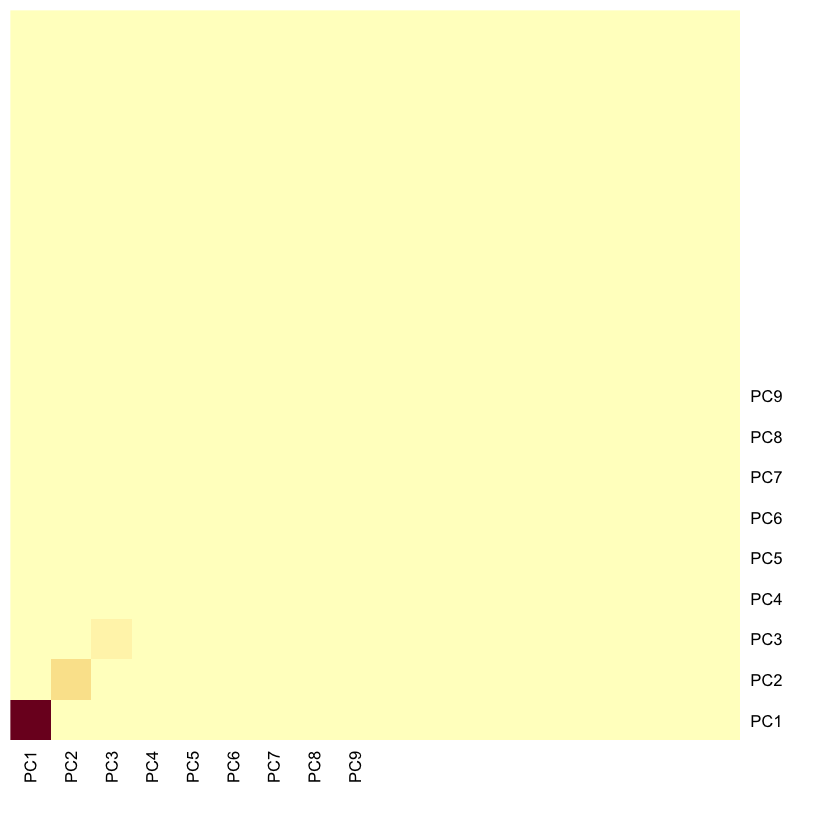

In [21]:
heatmap(cross_cov, Colv = NA, Rowv = NA, symm = TRUE)

In [22]:
cross_cov

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,,,,,,,,,
PC1,1.150491e-04,8.023806e-18,-8.145720e-18,-2.319919e-17,-8.249524e-18,-8.262600e-19,1.638103e-17,-2.850628e-17,-3.068278e-18,-3.423808e-06,-1.056446e-06,-6.991656e-07,-3.266082e-07,-2.927065e-09,-5.414684e-08,3.619067e-08,1.332095e-08,2.336590e-08
PC2,8.023806e-18,1.741281e-05,1.165337e-18,1.658429e-18,6.800568e-19,-2.604136e-20,-1.507314e-18,2.795220e-18,-2.965472e-19,6.073331e-08,2.731563e-08,4.699220e-08,6.158368e-08,-2.520239e-08,1.151807e-08,1.316629e-08,2.771425e-09,-9.672981e-09
PC3,-8.145720e-18,1.165337e-18,7.861264e-06,-1.068056e-19,-7.925724e-20,-6.565167e-20,6.551738e-19,-1.163602e-18,-7.134772e-20,-1.573636e-07,-1.130866e-07,5.625642e-08,4.297686e-08,5.515129e-08,1.282773e-08,1.414956e-08,-1.903544e-09,-1.640119e-09
PC4,-2.319919e-17,1.658429e-18,-1.068056e-19,3.195844e-06,1.007470e-18,-2.431981e-20,-8.523750e-19,1.511706e-18,6.245553e-20,-1.961277e-07,-1.585868e-10,-1.792863e-08,-3.333113e-08,-2.959875e-08,-1.264211e-08,-5.544320e-09,-4.628243e-09,-5.617212e-09
PC5,-8.249524e-18,6.800568e-19,-7.925724e-20,1.007470e-18,2.598002e-06,3.582527e-20,-2.067878e-19,4.532372e-19,-5.011129e-20,-2.187697e-07,-5.144237e-09,-1.622531e-08,-1.745540e-08,1.149302e-09,-9.030184e-09,-6.502677e-10,-1.149768e-09,-1.446906e-09
PC6,-8.262600e-19,-2.604136e-20,-6.565167e-20,-2.431981e-20,3.582527e-20,1.583603e-06,5.583291e-20,-5.867872e-20,8.610423e-21,-1.886057e-09,1.815721e-08,-1.733954e-08,7.611906e-09,9.825414e-09,5.588280e-09,1.697654e-09,-1.708935e-10,3.063998e-09
PC7,1.638103e-17,-1.507314e-18,6.551738e-19,-8.523750e-19,-2.067878e-19,5.583291e-20,1.243494e-06,5.880149e-19,2.316122e-21,-9.822700e-08,-2.376931e-08,4.222061e-09,-3.144910e-08,-1.126239e-08,-1.745202e-08,-2.668870e-09,-2.924198e-09,-3.493294e-09
PC8,-2.850628e-17,2.795220e-18,-1.163602e-18,1.511706e-18,4.532372e-19,-5.867872e-20,5.880149e-19,9.116018e-07,-4.546103e-20,3.095942e-09,-1.052860e-08,-1.046554e-08,1.774978e-08,4.838402e-09,-6.660652e-10,3.006384e-09,5.265797e-09,1.891251e-09
PC9,-3.068278e-18,-2.965472e-19,-7.134772e-20,6.245553e-20,-5.011129e-20,8.610423e-21,2.316122e-21,-4.546103e-20,2.099325e-07,-3.765261e-09,-5.047902e-09,-4.969220e-09,2.164800e-10,-3.485319e-09,1.060455e-09,-2.212055e-09,-2.022833e-10,-6.637016e-10
,-3.423808e-06,6.073331e-08,-1.573636e-07,-1.961277e-07,-2.187697e-07,-1.886057e-09,-9.822700e-08,3.095942e-09,-3.765261e-09,1.879228e-06,-3.578488e-08,1.603272e-08,3.220481e-08,2.333479e-08,2.088090e-08,1.988418e-08,1.803271e-08,7.380995e-09


In [23]:
cross_corr = cov_to_cor(cross_cov);

In [24]:
sqrt(diag(as.matrix(cross_cov)));

PC1          PC2          PC3          PC4          PC5          PC6 
0.0107260964 0.0041728665 0.0028037946 0.0017876923 0.0016118319 0.0012584129 
         PC7          PC8          PC9                                        
0.0011151205 0.0009547784 0.0004581840 0.0013708492 0.0007654232 0.0005779022 
                                                                              
0.0004616298 0.0003647623 0.0002877083 0.0002192004 0.0001565259 0.0001192825

In [25]:
diag(as.matrix(cross_cov));

PC1          PC2          PC3          PC4          PC5          PC6 
1.150491e-04 1.741281e-05 7.861264e-06 3.195844e-06 2.598002e-06 1.583603e-06 
         PC7          PC8          PC9                                        
1.243494e-06 9.116018e-07 2.099325e-07 1.879228e-06 5.858726e-07 3.339709e-07 
                                                                              
2.131021e-07 1.330515e-07 8.277608e-08 4.804884e-08 2.450036e-08 1.422833e-08

In [26]:
dim(cross_cov)

[1] 18 18

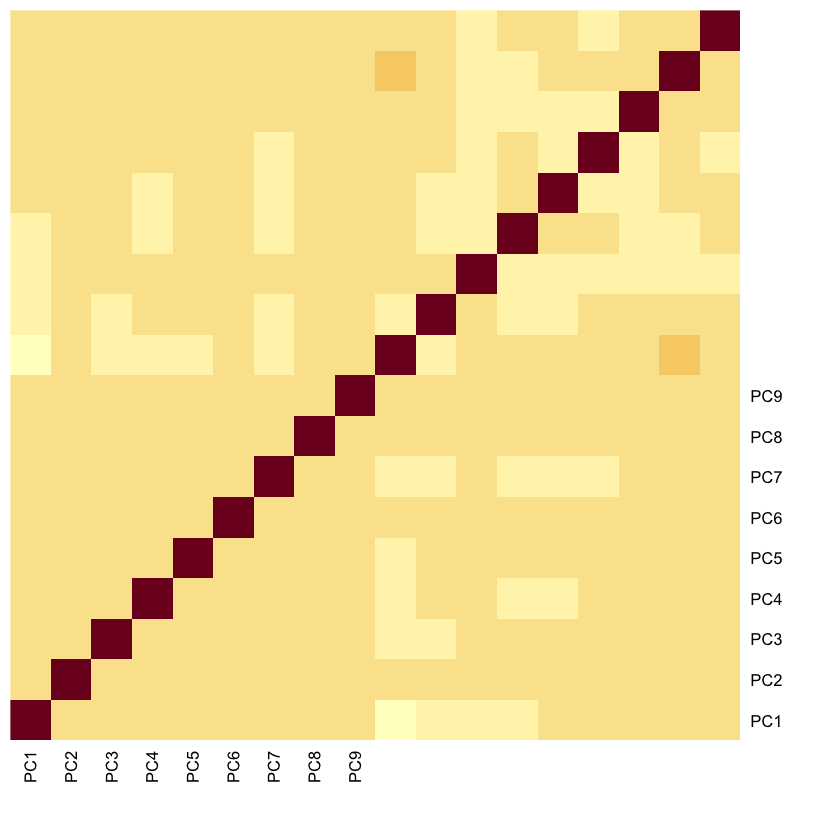

In [27]:
heatmap(cross_corr, Colv = NA, Rowv = NA, symm = TRUE)

In [28]:
sr = matrix(, 9, 2)

In [29]:
for (i in 1:9) {
    sr[i, 1] = mean(classical_pca[,i])/sd(classical_pca[,i]);
    sr[i, 2] = mean(ewm_pca[,i])/sd(ewm_pca[,i]);
}

In [30]:
sr

2.966701e-18,0.0008525337
-3.096588e-18,-0.0003691383
7.594366e-18,-0.0034873613
-5.659142e-18,0.0025883265
-6.476879e-18,0.0011190314
-9.124468e-19,0.0005135986
2.671361e-18,-0.0003919753
-7.679743e-18,-0.0032558025
-9.870457e-17,0.0037746498


In [31]:
srdiff = sr[,2] - sr[,1]

In [32]:
srdiff

[1]  0.0008525337 -0.0003691383 -0.0034873613  0.0025883265  0.0011190314
[6]  0.0005135986 -0.0003919753 -0.0032558025  0.0037746498

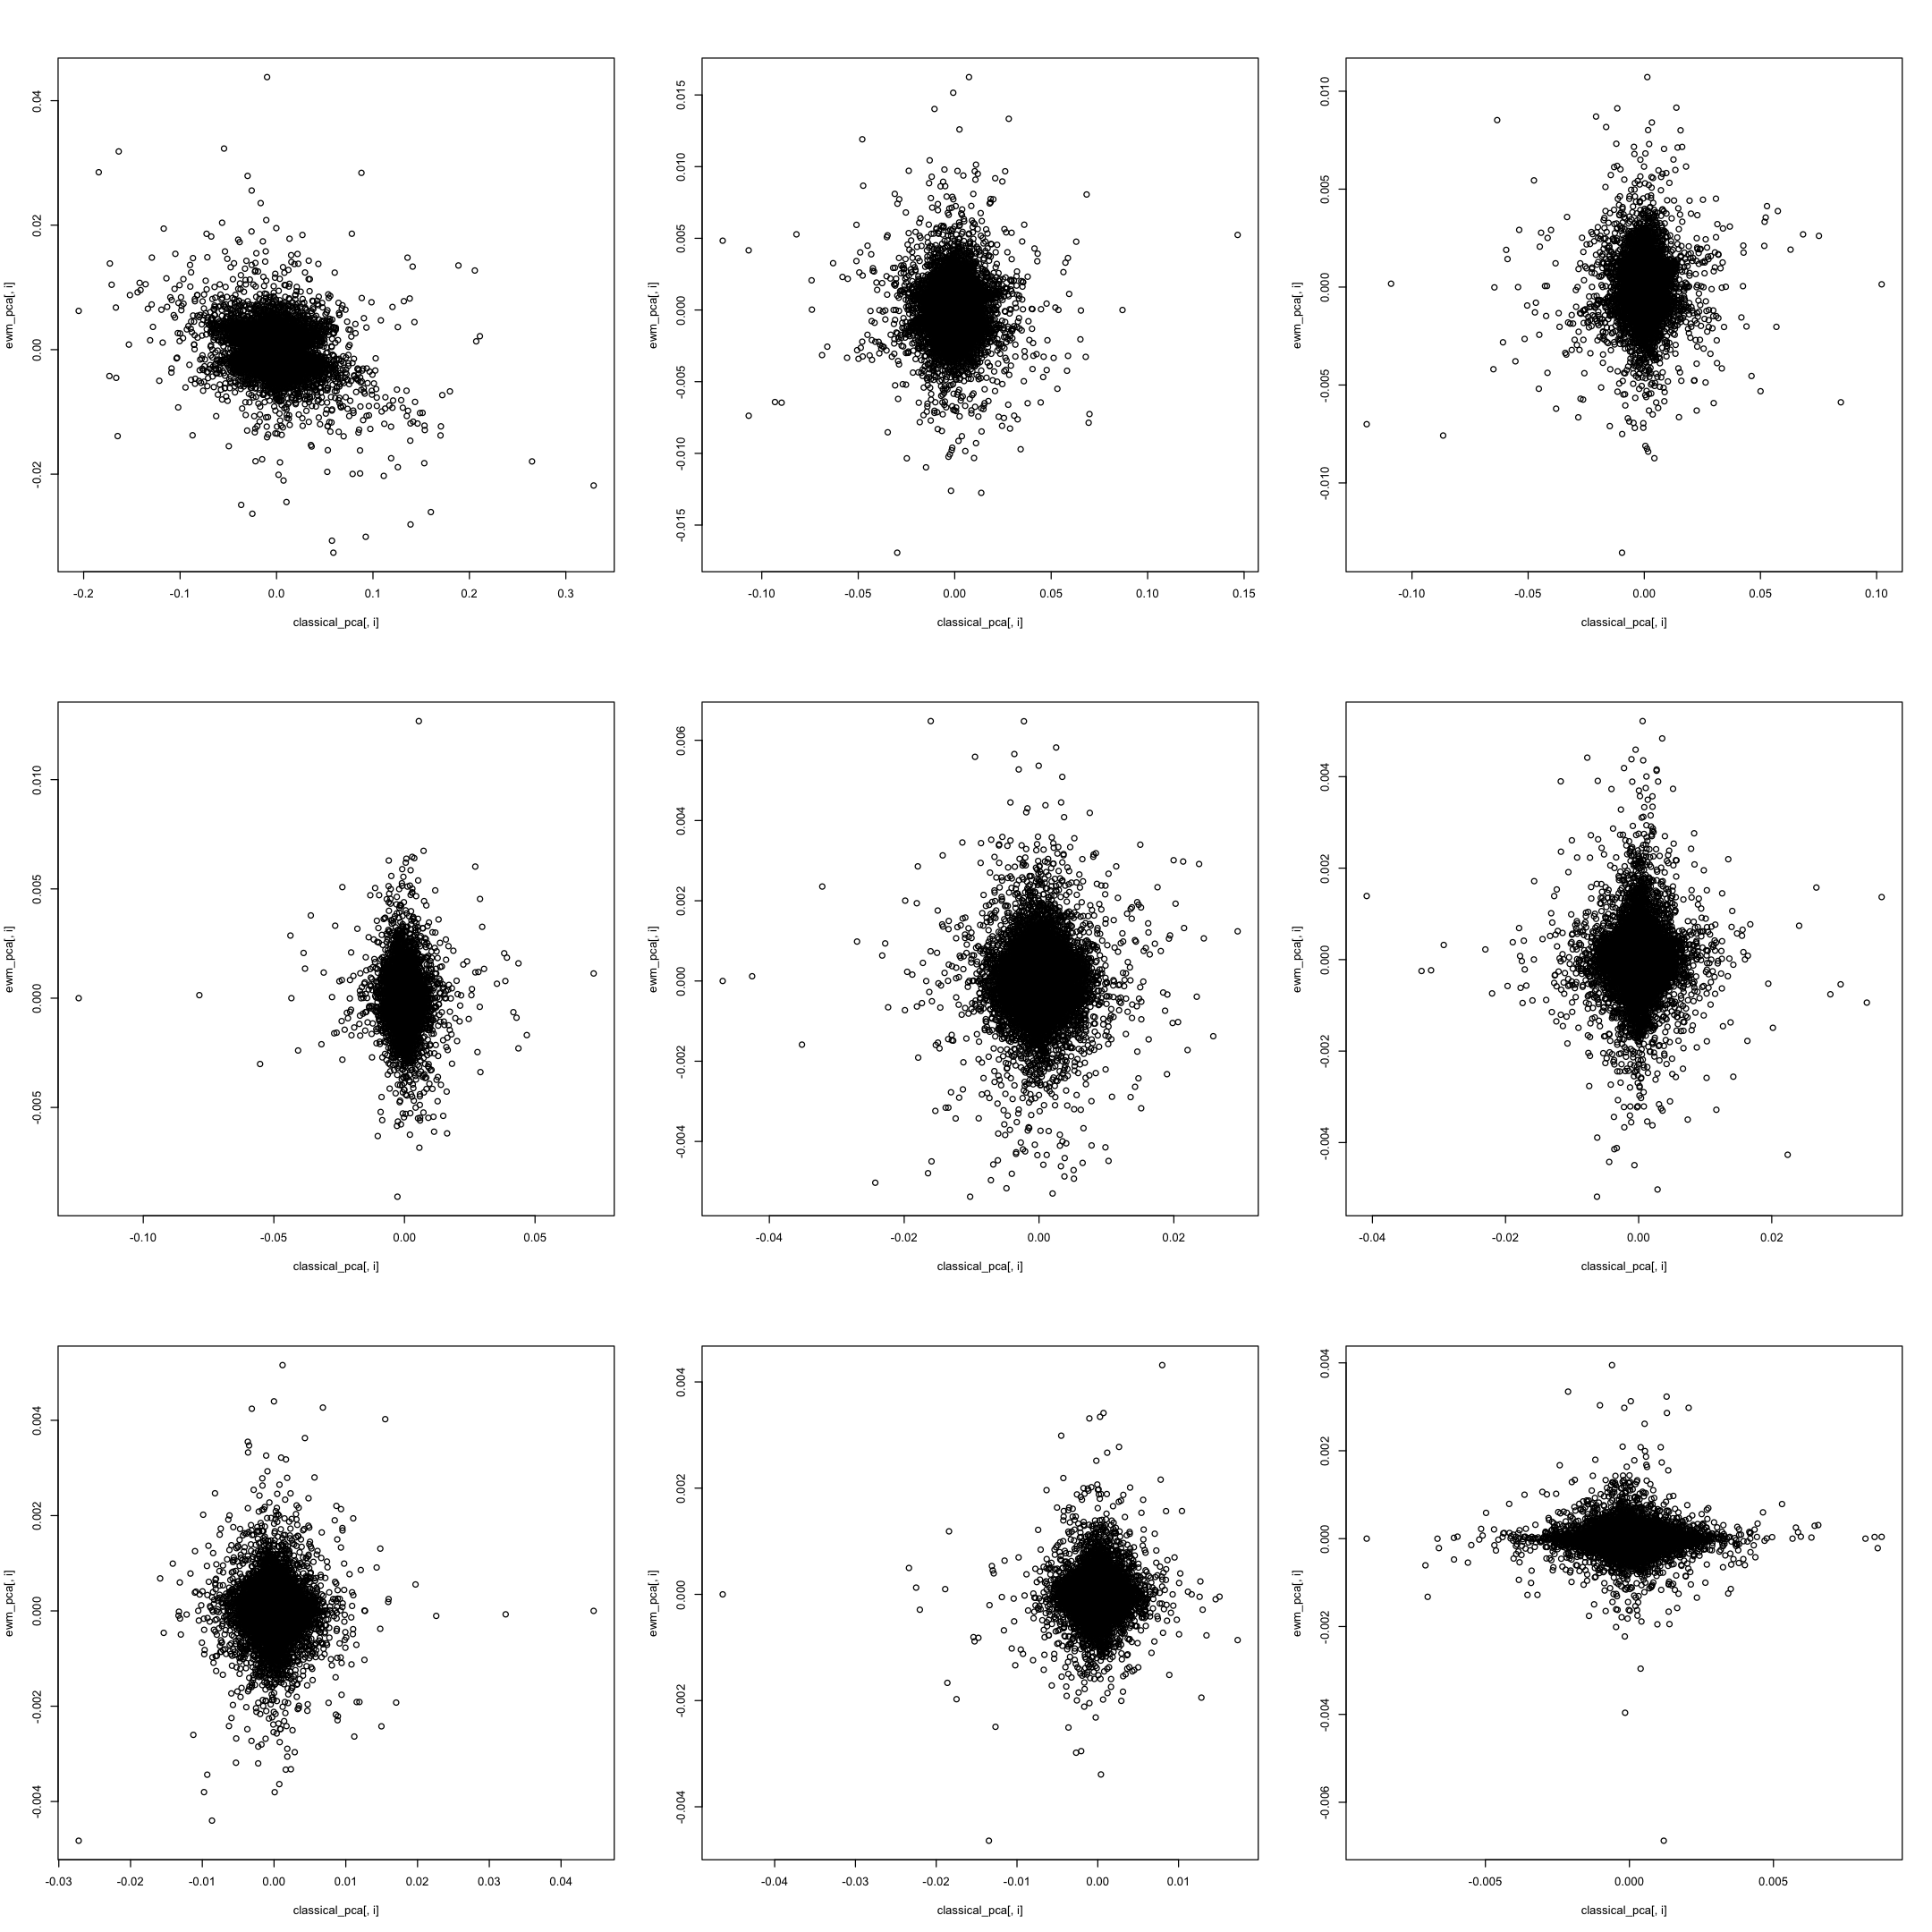

In [33]:
options(repr.plot.width=18, repr.plot.height=18)
par(mfrow=c(3,3))
for (i in 1:9) {
    plot(classical_pca[, i], ewm_pca[, i])
}

In [34]:
cor(ewm_pca)

1.00000000,-0.034104228,0.02023779,0.050890547,0.046666394,0.052942822,0.06617234,0.084039826,0.045138623
-0.03410423,1.000000000,0.03322831,-0.038924431,-0.062659337,-0.022558379,0.02211657,-0.007848970,-0.008101879
0.02023779,0.033228308,1.00000000,-0.101005848,-0.088381094,-0.063262003,-0.05408439,-0.055819868,-0.045176294
0.05089055,-0.038924431,-0.10100585,1.000000000,-0.022144752,-0.003177793,-0.07208615,-0.035657689,0.011040670
0.04666639,-0.062659337,-0.08838109,-0.022144752,1.000000000,-0.063784398,-0.06817484,-0.002981111,-0.001265959
0.05294282,-0.022558379,-0.06326200,-0.003177793,-0.063784398,1.000000000,-0.06643839,-0.025871658,-0.035337762
0.06617234,0.022116573,-0.05408439,-0.072086152,-0.068174845,-0.066438393,1.00000000,0.046250189,0.026460147
0.08403983,-0.007848970,-0.05581987,-0.035657689,-0.002981111,-0.025871658,0.04625019,1.000000000,0.033239540
0.04513862,-0.008101879,-0.04517629,0.011040670,-0.001265959,-0.035337762,0.02646015,0.033239540,1.000000000


In [35]:
cor(classical_pca)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
PC1,1.000000e+00,1.792686e-13,-2.708579e-13,-1.209869e-12,-4.771637e-13,-6.121416e-14,1.369549e-12,-2.783532e-12,-6.243285e-13
PC2,1.792686e-13,1.000000e+00,9.960260e-14,2.223155e-13,1.011093e-13,-4.959136e-15,-3.239271e-13,7.015827e-13,-1.551027e-13
PC3,-2.708579e-13,9.960260e-14,1.000000e+00,-2.130861e-14,-1.753771e-14,-1.860700e-14,2.095504e-13,-4.346660e-13,-5.553849e-14
PC4,-1.209869e-12,2.223155e-13,-2.130861e-14,1.000000e+00,3.496389e-13,-1.081046e-14,-4.275788e-13,8.856699e-13,7.624972e-14
PC5,-4.771637e-13,1.011093e-13,-1.753771e-14,3.496389e-13,1.000000e+00,1.766227e-14,-1.150492e-13,2.945121e-13,-6.785407e-14
PC6,-6.121416e-14,-4.959136e-15,-1.860700e-14,-1.081046e-14,1.766227e-14,1.000000e+00,3.978737e-14,-4.883767e-14,1.493349e-14
PC7,1.369549e-12,-3.239271e-13,2.095504e-13,-4.275788e-13,-1.150492e-13,3.978737e-14,1.000000e+00,5.522859e-13,4.533147e-15
PC8,-2.783532e-12,7.015827e-13,-4.346660e-13,8.856699e-13,2.945121e-13,-4.883767e-14,5.522859e-13,1.000000e+00,-1.039194e-13
PC9,-6.243285e-13,-1.551027e-13,-5.553849e-14,7.624972e-14,-6.785407e-14,1.493349e-14,4.533147e-15,-1.039194e-13,1.000000e+00
